In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import zipfile
from datetime import datetime

In [2]:
#!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip
#!mkdir chap7
#with zipfile.ZipFile('dow_jones_index.zip') as z:
#    z.extractall('chap7/')
    
#os.remove('dow_jones_index.zip')

In [3]:
df_origin = pd.read_csv('chap7/dow_jones_index.data')
df_origin.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [4]:
#chack datatype
df_origin.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [5]:
#check NAs
df_origin.isnull().any()

quarter                               False
stock                                 False
date                                  False
open                                  False
high                                  False
low                                   False
close                                 False
volume                                False
percent_change_price                  False
percent_change_volume_over_last_wk     True
previous_weeks_volume                  True
next_weeks_open                       False
next_weeks_close                      False
percent_change_next_weeks_price       False
days_to_next_dividend                 False
percent_return_next_dividend          False
dtype: bool

In [6]:
#remove $ mark from prices

def remove_dol(x):
    return float(x.strip('$'))

df_origin[['open','high','low','close']] = df_origin[['open','high','low','close']].apply(lambda y: y.map(remove_dol))

In [7]:
#convert date from string to date type

df_origin['date'] = pd.to_datetime(df_origin.date, format='%m/%d/%Y')

In [8]:
#descriptive statistics by stock

df_origin.groupby('stock')['close'].agg(['count','mean','max','min'])

,count,mean,max,min
stock,,,,
AA,25,16.5044,17.92,14.72
AXP,25,46.7124,51.19,43.53
BA,25,73.4480,79.78,69.10
BAC,25,13.0516,15.25,10.52
CAT,25,103.1520,115.41,92.75
CSCO,25,17.8992,22.05,14.93
CVX,25,101.1756,109.66,91.19
DD,25,52.8736,56.79,48.35
DIS,25,41.2496,43.56,37.58


In [9]:
#transform the data to stock prices at close indexed by date

df_test=df_origin[['date', 'stock', 'close']]
df_test.set_index(['date','stock'], inplace=True)

stock_close = df_test.unstack(level=1).stack(level=0)
stock_close.reset_index(level=1, drop=True, inplace=True)
stock_close.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28


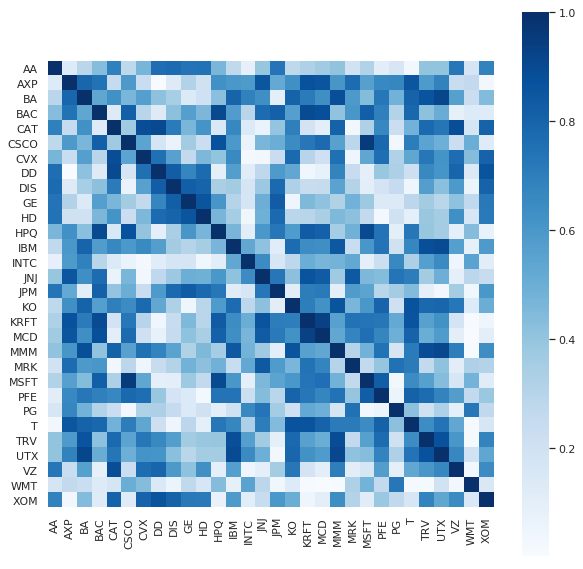

In [10]:
#compute correlation matrix of stock prices, take absolute value and
#draw heatmap

corr_matrix = np.abs(stock_close.corr().values)
labels = list(stock_close.columns)


plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, square=True, cbar=True, cmap=plt.cm.get_cmap('Blues'), xticklabels=labels, yticklabels=labels)
plt.xlabel('')
plt.ylabel('');

In [11]:
#exclude diagonal elements == 1
#find highlly correlated stocks

highcorr_idx = np.argwhere(corr_matrix == corr_matrix[corr_matrix!=1.0].max())
print(highcorr_idx)

highcorr = [labels[i] for i in highcorr_idx[0]]
highcorr

[[ 5 21]
 [21  5]]


['CSCO', 'MSFT']

<Figure size 432x288 with 0 Axes>

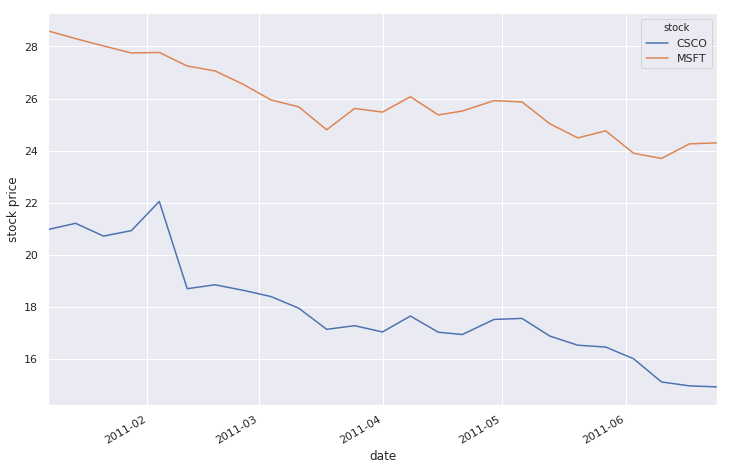

In [12]:
#draw the line plot of two most correlated stocks

plt.figure()

stock_close[highcorr].plot.line(figsize=(12, 8))
plt.ylabel('stock price');

In [13]:
#rolling average for past 5 periods

stock_close.rolling(5, min_periods=1).mean()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.4200,44.360000,69.380000,14.250000,93.730000,20.970000,91.1900,49.760000,39.450000,18.430000,...,37.3500,28.600000,18.340000,64.500000,28.850000,53.3300,79.080000,35.930000,54.080000,75.590
2011-01-14,16.1950,45.305000,69.725000,14.750000,93.870000,21.090000,92.0100,49.780000,39.370000,18.625000,...,35.7900,28.450000,18.340000,65.015000,28.640000,53.9800,79.080000,35.695000,54.445000,76.715
2011-01-21,16.0600,45.536667,70.376667,14.583333,93.496667,20.966667,92.6000,49.303333,39.493333,18.996667,...,35.1600,28.306667,18.346667,65.313333,28.536667,54.3200,79.453333,35.446667,54.873333,77.470
2011-01-28,16.0775,45.117500,70.090000,14.337500,94.042500,20.957500,92.7925,49.550000,39.332500,19.297500,...,34.6375,28.167500,18.297500,65.035000,28.275000,54.6925,79.947500,35.492500,55.330000,77.850
2011-02-04,16.2900,44.858000,70.348000,14.328000,95.152000,21.176000,93.6560,50.146000,39.608000,19.550000,...,34.2880,28.088000,18.498000,64.750000,28.214000,55.2360,80.462000,35.656000,55.470000,78.936
2011-02-11,16.4800,45.336000,70.900000,14.432000,97.114000,20.722000,94.7080,51.110000,40.400000,20.130000,...,33.4320,27.818000,18.596000,64.796000,28.138000,56.3680,81.686000,35.748000,55.792000,80.382
2011-02-18,16.7420,45.192000,71.494000,14.332000,99.484000,20.250000,95.8860,52.346000,41.254000,20.654000,...,33.1560,27.570000,18.766000,64.550000,28.166000,57.6260,82.872000,35.980000,55.906000,81.714
2011-02-25,16.9200,44.698000,71.618000,14.322000,101.334000,19.834000,97.5500,53.490000,41.896000,20.870000,...,32.8140,27.276000,18.866000,63.936000,28.126000,58.5460,83.506000,36.184000,55.110000,82.986
2011-03-04,17.0100,44.670000,72.132000,14.426000,102.806000,19.328000,99.6260,54.206000,42.836000,20.904000,...,32.8120,26.916000,19.168000,63.502000,28.212000,59.2200,83.792000,36.274000,54.184000,84.204


In [14]:
#compute change rate by shift() function

change_rate = np.log(stock_close / stock_close.shift(1))
change_rate.head(6)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,-0.027788,0.041723,0.009896,0.067823,0.002983,0.011380,0.017825,0.000804,-0.004064,0.020940,...,-0.087230,-0.010545,0.000000,0.015843,-0.014665,0.024084,0.000000,-0.013167,0.013408,0.029331
2011-01-21,-0.011335,-0.005420,0.022717,-0.067823,-0.013493,-0.023373,0.010182,-0.029549,0.011388,0.047727,...,-0.009687,-0.009943,0.001090,0.005782,-0.003524,0.006750,0.014064,-0.014487,0.016646,0.014539
2011-01-28,0.021304,-0.047639,-0.034777,-0.046687,0.031102,0.010084,-0.004382,0.039340,-0.022650,0.023036,...,-0.024788,-0.009683,-0.011504,-0.026287,-0.030099,0.014620,0.015220,0.019270,0.017256,0.000127
2011-02-04,0.060734,-0.000912,0.030583,0.049490,0.040052,0.052129,0.039274,0.043578,0.046766,0.017665,...,-0.005458,0.000720,0.061435,-0.009233,0.017310,0.028265,0.013297,0.018905,-0.011887,0.052887
2011-02-11,0.013330,0.064724,0.010591,0.033038,0.038896,-0.164789,-0.006820,0.038283,0.064216,0.036767,...,0.005458,-0.018903,-0.024654,0.017454,0.017718,0.027149,0.031961,0.002201,-0.006087,-0.005539


<Figure size 432x288 with 0 Axes>

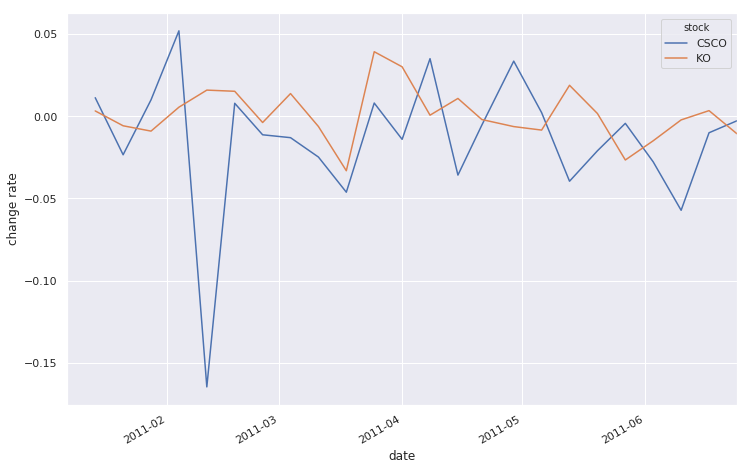

In [15]:
#plot the change rates of the most and least volatile stocks

stds = change_rate.apply(np.std)

plt.figure()

change_rate[[stds.idxmax(), stds.idxmin()]].plot(figsize=(12,8))
plt.ylabel('change rate');